# Обработка shape-файла и характеристики шлифа

Обработка shape-файла производится при создании экземпляра класса ThinSection из модуля "thin_section_class.py".

In [8]:
import numpy as np
import pandas as pd

import scipy.stats as sps
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import seaborn as sns
sns.set(style='ticks', font_scale=1.7)

import os

In [9]:
from thin_section_class import ThinSection
import pickle

In [10]:
def save_pickle(data, path_to_pickle_files):
    """
    Cохраняет объект как pickle файл
    :param data: объект класса ThinSection
    :param path_to_pickle_files: путь сохранения файла
    :return: None
    """
    name = data.name
    
    object_name = name + '_object'
    path_to_object = os.path.join(path_to_pickle_files, object_name) 
    file = open(path_to_object, 'wb')
    pickle.dump(data, file)
    file.close()

In [11]:
def get_shp_filename(path_to_shape_files, file_directory=''):
    """
    Ищет .shp файл в папке и возвращает его название
    :param path_to_shape_files: путь до директории с папками, в которых лежат shape файлы
    :param file_directory: название конкретной папки
    :return: название файла "file_name.shp"
    """
    p = os.path.join(path_to_shape_files, file_directory)
    for name in os.listdir(p):
        if name[-4:] == '.shp':
            return name

# Создание объектов ThinSection и сохранение pickle файлов

In [12]:
path_to_shape_files = '.\\shp_files\\'
path_to_pickle_files = '.\\pickle_files\\'

Входными данными при создании экземпляра класса ThinSection являются путь до .shp файла, назавние шлифа и тектонический тип шлифа 

При создании экземпляра автоматически вычисляются базовые геометрические характеристики шлифа

После этого могут быть вызваны следующие методы:
- `perform_IXY_classification()` - для определения топологических характеристик
- `perform_stat_analysis()` - для проведения статистического анализа
- `calc_entropy()`, `calc_fractal_dimension()` - для вычисления энтропии и фрактаьлной размерности 

In [14]:
name = '55-3' 
shp_filename = get_shp_filename(path_to_shape_files, name)  # название .shp файла
path_to_shp = os.path.join(path_to_shape_files, name, shp_filename)  # полный путь до .shp файла

tect_type = 'Катаклазит'

# создание объекта
data = ThinSection(path_to_shp, name, tect_type)

# вычисление топологических характеристик
data.perform_IXY_classification(epsilon=5)

# выполнение статистического анализа
data.perform_stat_analysis()  

# вычисление энтропии и фрактальной размерности
data.calc_entropy()
data.calc_fractal_dimension() 

# сохранение pickle
save_pickle(data, path_to_pickle_files)

100%|█████████████████████████████████████████████████████████████████████████| 28902.0/28902 [01:52<00:00, 256.27it/s]


# Чтение данных

In [34]:
filename = '55-3_object'
file = open(path_to_pickle_files + filename, 'rb')
data = pickle.load(file)
file.close()

## Атрибуты объекта

### Базовые характеристики шлифа

In [35]:
# название шлифа, тектонический тип
data.name, data.tectonic_type

('55-3', 'Катаклазит')

In [36]:
# общее количество трещин в шлифе
data.lineaments_sample_size

5529

In [37]:
# представление отдельной трещины (координаты начал и концов ее сегментов [x1, y1, x2, y2]) 
data.lineaments_sample[0]

array([[ 3765.        , -3168.        ,  3770.        , -3131.        ],
       [ 3770.        , -3131.        ,  3772.        , -3117.        ],
       [ 3772.        , -3117.        ,  3791.        , -3084.        ],
       [ 3791.        , -3084.        ,  3798.        , -3070.        ],
       [ 3798.        , -3070.        ,  3796.        , -3046.        ],
       [ 3796.        , -3046.        ,  3796.        , -3034.        ],
       [ 3796.        , -3034.        ,  3806.        , -3010.        ],
       [ 3806.        , -3010.        ,  3805.        , -2998.        ],
       [ 3805.        , -2998.        ,  3817.        , -2947.        ],
       [ 3817.        , -2947.        ,  3816.        , -2936.        ],
       [ 3816.        , -2936.        ,  3833.        , -2860.        ],
       [ 3833.        , -2860.        ,  3830.        , -2768.        ],
       [ 3830.        , -2768.        ,  3845.67164179, -2732.47761194]])

In [38]:
# выборка длин трещин
data.lineaments_length_sample

array([1.12465374, 0.58504959, 0.58716532, ..., 0.20467387, 0.23077419,
       0.23200216])

In [39]:
# выборка азимутов трещин
data.lineaments_azimuth_sample

array([79.55580452, 70.98296604, 63.9858528 , ..., 46.02303019,
       33.86369057, 37.11686068])

### Статистические характеристики шлифа

**1. Оценки максимального правдоподобия для выборки длин трещин**

Рассматриваемые распределения:

- Степенное

$$p(x, \alpha) = \frac{\alpha - 1}{x_{min}} \left( \frac{x}{x_{min}} \right)^{-\alpha}$$

- Экспоненциальное
$$ p(x, \lambda) = \lambda \exp{(\lambda x_{min})} \cdot \exp{(-\lambda x)} $$

- Лог-нормальное
$$ p(x, \mu, \sigma) = \sqrt{\frac{2}{\pi \sigma^2}} \left[\text{erfc}\left( \frac{\ln{x_{min}} - \mu}{\sigma \sqrt{2}} \right) \right]^{-1}  \cdot \frac{1}{x} \exp{\left[ - \frac{(\ln{x} - \mu)^2}{2 \sigma^2} \right]}$$

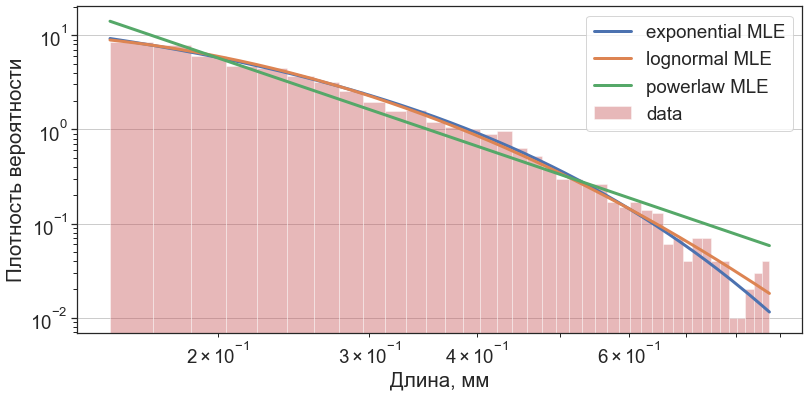

In [40]:
# отрисовка оценок максимального правдоподобия
data.draw_length_MLE()

Параметры найденных распределений

In [41]:
print('powerlaw alpha:', data.powerlaw_alpha_length)
print('exponential lambda:', data.exponential_lambda_length)
print('lognormal mu:', data.lognormal_mu_length)
print('lognormal sigma:', data.lognormal_sigma_length)

powerlaw alpha: 3.1122828852038777
exponential lambda: 9.233105188831264
lognormal mu: -1.8855179934895352
lognormal sigma: 0.5880393001413761


**2. Результаты работы критерия отношения правдоподобия**

Гипотеза: $H_0: ~ P=P_0 ~~\text{vs}.~~ H_1: ~ P=P_1$

Логарифмическое отношение правдоподобия: $R = \sum \limits_{i=0}^n \ln{ \left( \frac{P_{0}(x_i)}{P_{1}(x_i)} \right) }$

Критерий: 
1) $R > 0  \Rightarrow H_0$ не отклоняется
2) $R < 0  \Rightarrow H_0$ отклоняется

p-value: $p = \text{erfc} \left(  \frac{|R|}{\sigma \sqrt{2n}} \right)$

$p<0.1 ~ \Rightarrow ~$ результат статистически значим 

In [42]:
# таблица с результатами работы критерия
data.stat_tests_lineaments_length

,R,p,better fit,significant
powerlaw vs. exponential,-14.521862,0.0,exponential,True
powerlaw vs. lognormal,-14.704798,0.0,lognormal,True
lognormal vs. exponential,-3.541246,0.0,exponential,True


**3. Энтропия и фрактальная размерность**

1) Вычислялась взвешенная энтропия Шеннона азимутального распределения трещин с учетом их плотности. Данное значение энтропии характеризует степень пространственной неоднородности образца


2) Фрактальная размерность определялась с помощью box-counting алгоритма

In [43]:
# энтропия
data.entropy_rho_az

3.6311392866213192

In [44]:
# фрактальная размерность
data.frac_dim

1.7375292006135519

### Топологические характеристики шлифа

Для описания топологических свойств сети трещин определяется число вершин $N_X, ~ N_I, ~ N_Y$ следующих типов:

- Тип I - свободная вершина, конец трещины
- Тип Y - смежная вершина - точка, принадлежащая двум трещинам и являющаяся концом одной из них
- Тип X - точка пересечения двух трещин



![](images/network_topology.png)

In [45]:
print('Число вершин X:', data.X_nodes)
print('Число вершин I:', data.I_nodes)
print('Число вершин Y:', data.Y_nodes)

Число вершин X: 15073
Число вершин I: 5038
Число вершин Y: 7978


Относительное число вершин X, I, Y:

$$\frac{N_X}{N}, ~ \frac{N_I}{N}, ~ \frac{N_Y}{N}, ~~ N = N_X + N_I + N_Y $$

In [46]:
data.XIY_counts_normed

array([0.53661576, 0.17935847, 0.28402578])